# Color Thresholds (RGB -> HLS)
HLS can isolate the lightness (L) to detect lane lines under different conditions of brightness. Hue (H) and Saturation (S) stay fairly consistent

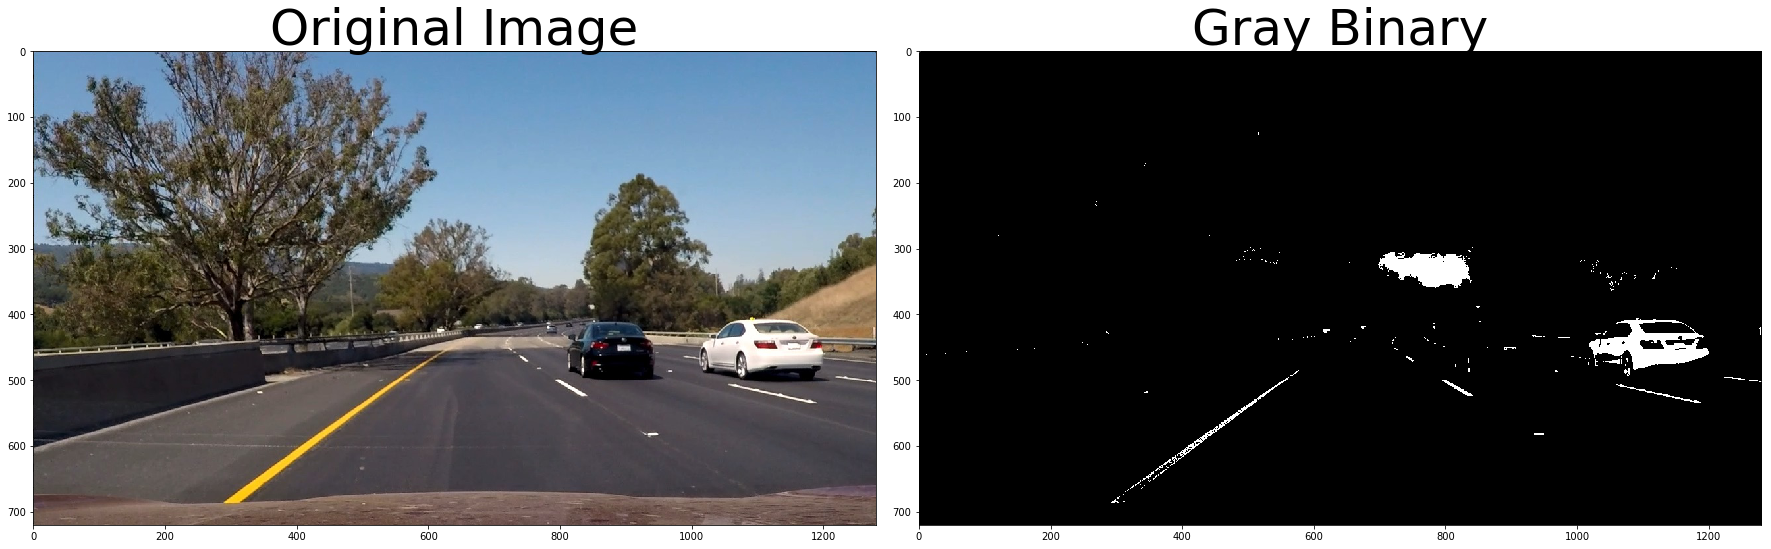

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

image = mpimg.imread('test6.jpg')
thresh = (200, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray Binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

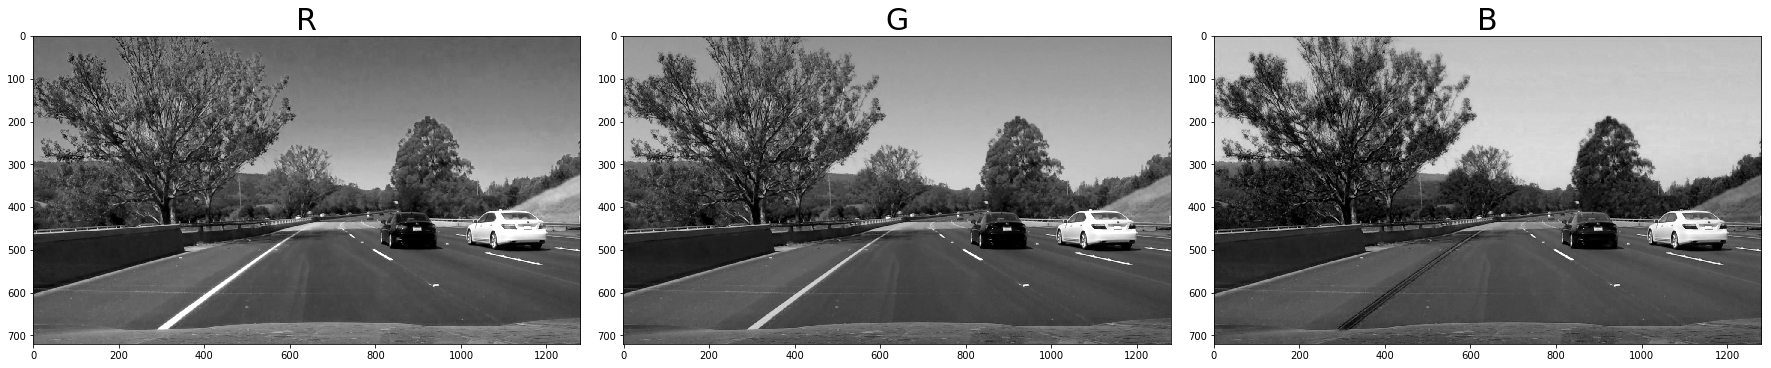

In [5]:
# R-G-B
# Notice that B channel does not pick up the yellow lane at all
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image[:,:,0], cmap='gray')
ax1.set_title('R', fontsize=30)
ax2.imshow(image[:,:,1], cmap='gray')
ax2.set_title('G', fontsize=30)
ax3.imshow(image[:,:,2], cmap='gray')
ax3.set_title('B', fontsize=30)                 
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# HLS

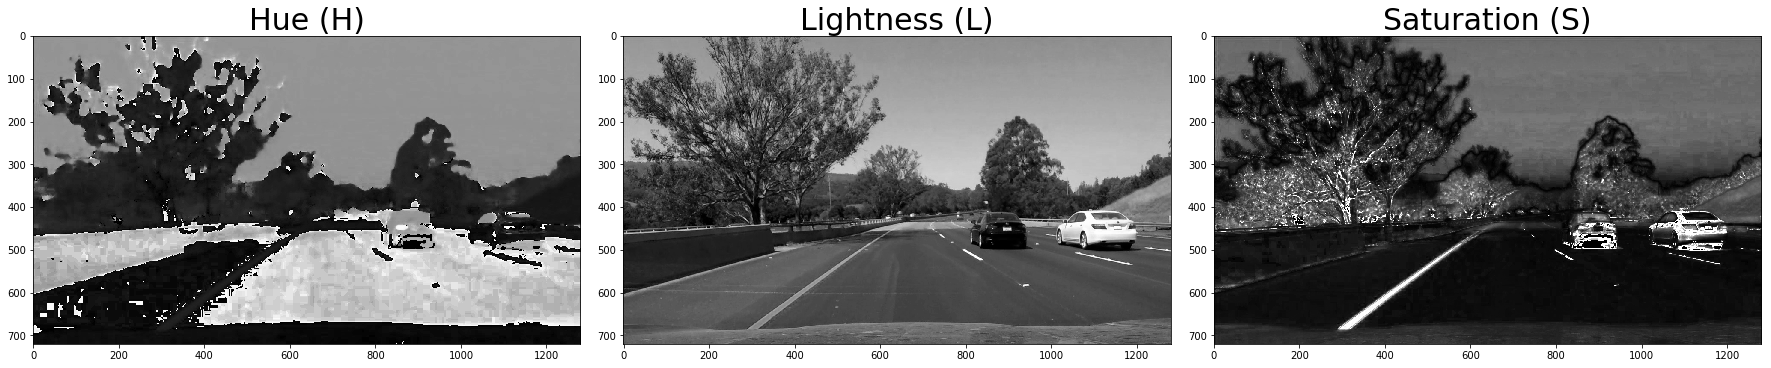

In [10]:
# Notice that S channel picks up the line really well
# In the H channel, the lane line appears dark

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('Hue (H)', fontsize=30)
ax2.imshow(L, cmap='gray')
ax2.set_title('Lightness (L)', fontsize=30)
ax3.imshow(S, cmap='gray')
ax3.set_title('Saturation (S)', fontsize=30)                 
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

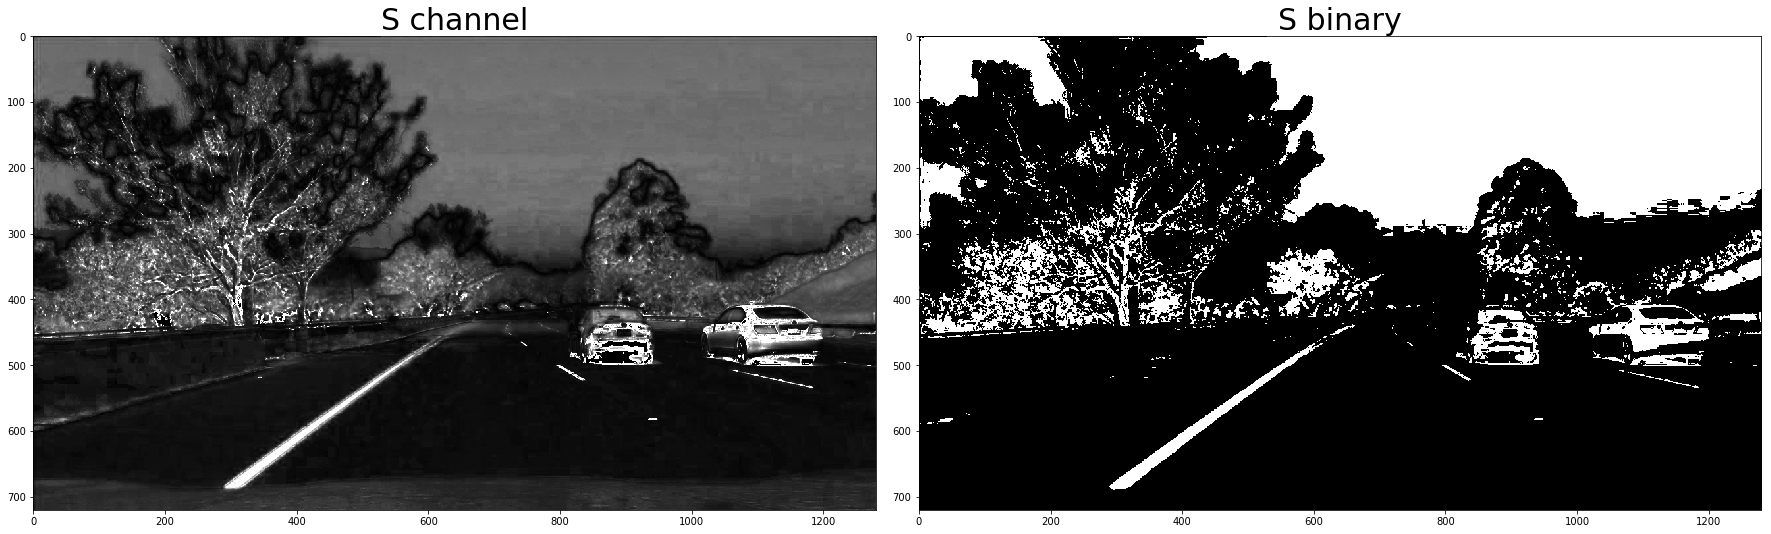

In [17]:
# Threshold for S channel
thresh_S = (90,255)
binary_S = np.zeros_like(S)
binary_S[(S>thresh_S[0]) & (S<=thresh_S[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(S, cmap='gray')
ax1.set_title('S channel', fontsize=30)
ax2.imshow(binary_S, cmap='gray')
ax2.set_title('S binary', fontsize=30)              
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

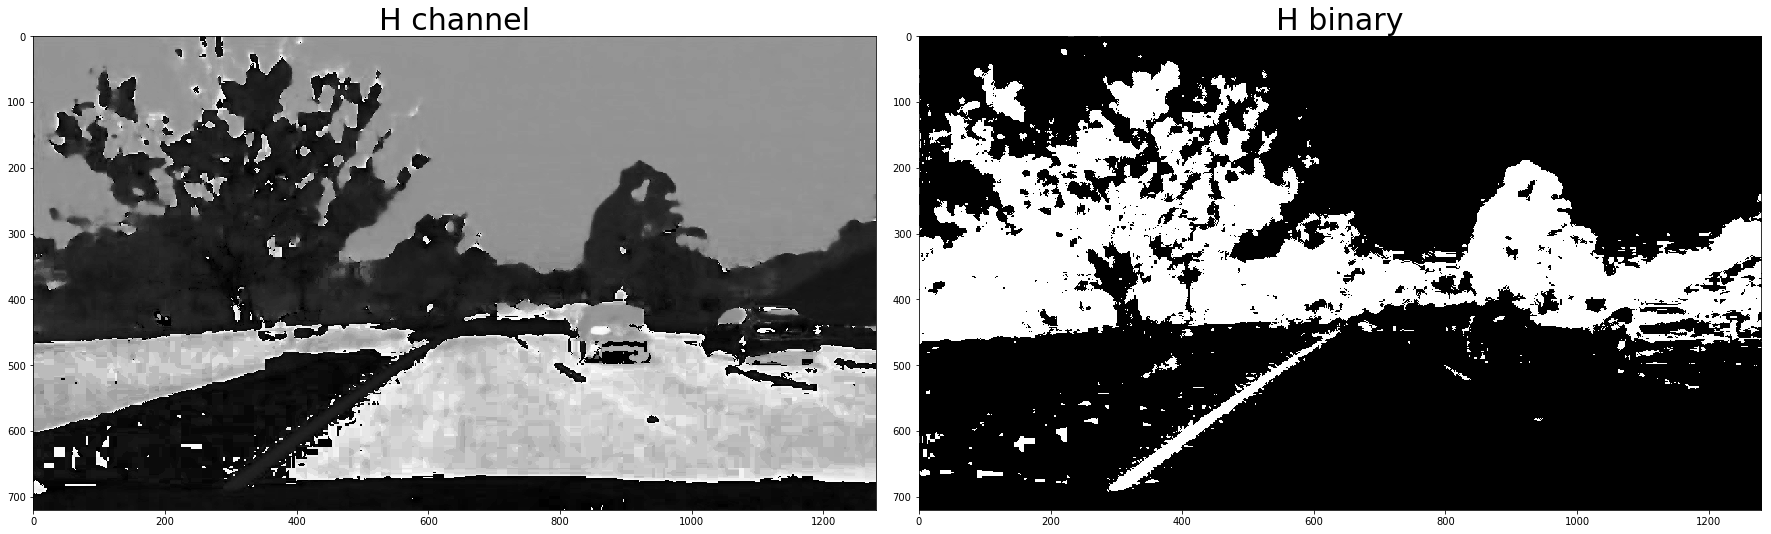

In [22]:
# Threshold for H channel
thresh_H = (15,100)
binary_H = np.zeros_like(H)
binary_H[(H>thresh_H[0]) & (H<=thresh_H[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('H channel', fontsize=30)
ax2.imshow(binary_H, cmap='gray')
ax2.set_title('H binary', fontsize=30)              
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)